# <a id="TOC"> Start </a>



In [2]:
import backtesting # To backtest the strategy
import heuristic_pf_construct # To test out the weighted strategies.
import eda_pipeline

from typing import Optional, List, Tuple, Dict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [3]:
tickers = [
    "JPM",   # JPMorgan (NYSE)
    "GS",    # Goldman Sachs (NYSE)
    "MS",    # Morgan Stanley (NYSE)
    "BAC",   # Bank of America (NYSE)
    "C",     # Citigroup (NYSE)
    "UBS",   # UBS (NYSE / SIX)
    "BARC.L",# Barclays (LSE)
    "HSBA.L",# HSBC (LSE)
    "BNP.PA" # BNP Paribas (Euronext Paris)
]

columns_wanted = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]

data = yf.download(
    tickers=tickers,
    period="3y",          # or use start="2022-01-01", end="2025-11-26"
    interval="1d",
    group_by="ticker",    # organizes returned DataFrame by ticker first
    threads=True,
    auto_adjust=False     # keep Adj Close column rather than auto-adjusting all columns
)

# --- 4) Example: extract only needed columns into a MultiIndex DataFrame ---
# data[ticker][col] access pattern; create a cleaned df with tickers on top-level columns
clean = data.copy()
clean.columns = [f"{column}" for column in data.columns]
# now clean is a DataFrame with columns like ('JPM','Open'), ('JPM','Close'), ...

# --- 5) Quick derived metrics examples ---
# 5  using Adj Close
adj = pd.concat({t: data[t]["Adj Close"] for t in tickers}, axis=1)



# 5b) for daily returns
daily_returns = adj.pct_change().dropna()




[*********************100%***********************]  9 of 9 completed
C:\Users\trund\AppData\Local\Temp\ipykernel_16960\50166549.py:37: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = adj.pct_change().dropna()


In [5]:
eda_pipeline.missing_and_duplicates(adj)

Total rows: 776, Duplicated rows: 0

Top missing columns:
        missing_count  missing_percentage
JPM                24              3.0928
GS                 24              3.0928
MS                 24              3.0928
BAC                24              3.0928
C                  24              3.0928
UBS                24              3.0928
BARC.L             18              2.3196
HSBA.L             17              2.1907
BNP.PA              8              1.0309


In [6]:
adj[adj.isna().any(axis=1)]

,JPM,GS,MS,BAC,C,UBS,BARC.L,HSBA.L,BNP.PA
Date,,,,,,,,,
2022-12-27,122.353065,317.152679,76.857475,30.224682,39.802971,17.140705,NaN,NaN,42.974621
2023-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.714737
2023-01-16,NaN,NaN,NaN,NaN,NaN,NaN,182.285553,594.791626,47.399410
2023-02-20,NaN,NaN,NaN,NaN,NaN,NaN,175.673355,619.337646,52.126617
2023-04-10,120.593811,303.534973,76.511887,26.128342,42.124275,19.035009,NaN,NaN,NaN
2023-05-01,133.144470,318.115784,80.785187,27.157015,43.254353,18.911892,NaN,NaN,NaN
2023-05-08,129.250107,304.982819,77.569580,25.894548,42.439610,18.553280,NaN,NaN,46.388714
2023-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.757893
2023-06-19,NaN,NaN,NaN,NaN,NaN,NaN,153.324036,613.908997,48.362320


Based on the analysis above - we can identify that the missing values are caused by markets closing due to holidays on those days. The preceding analysis opts for a forward fill to deal with thees values.

The next analysis requires us to check that there are no stupid values like 0 or negative values. 

In [8]:
adj = adj.ffill(inplace=False)
adj[(adj <= 0).any(axis=1)]

,JPM,GS,MS,BAC,C,UBS,BARC.L,HSBA.L,BNP.PA
Date,,,,,,,,,


# <a id="BNP TSA"> __BNP TSA__ </a>
In this next section - we want to perform some analysis on the time-series behaviour of BNP.


<Figure size 1000x300 with 0 Axes>

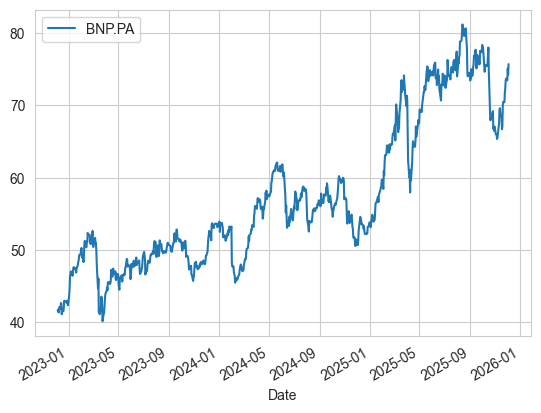

In [4]:
import eda_pipeline

target = "BNP.PA"

df = eda_pipeline.eda_pipeline(adj)

# Want to do some TSA on the returns of target
target_series = df[[target]]

plt.figure(figsize=(10,3))
target_series.plot()
plt.show()


A clear trend is observed - we can try differencing the data and obtaining a stationary time series.

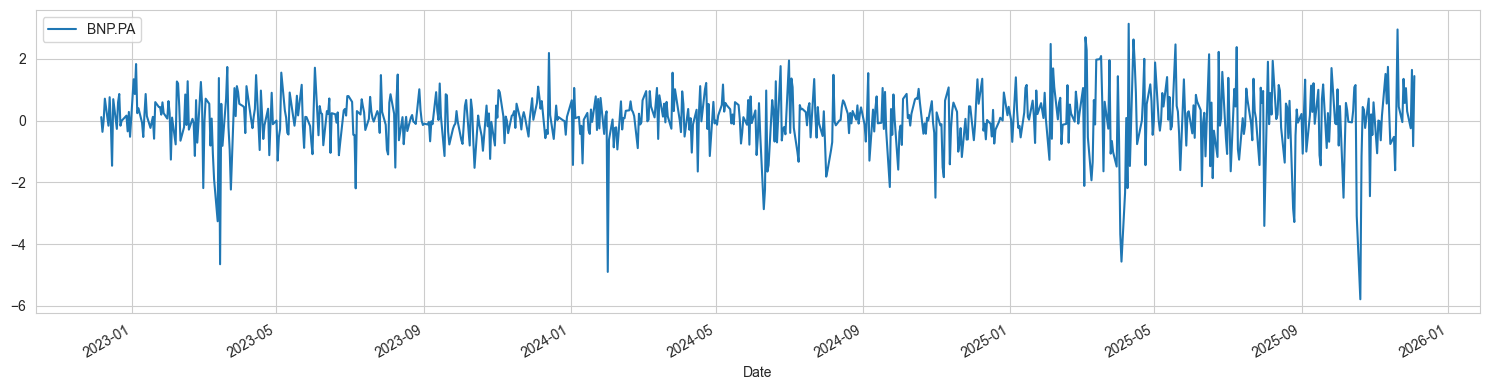

In [5]:
# Want to try differencing the df

target_returns= target_series.diff()
target_returns.dropna(inplace=True)
figsize = (15,4)
fig, ax = plt.subplots(figsize=figsize)

target_returns.plot(ax=ax)
plt.tight_layout()
plt.show()

From the returns plot we see that the series exhibits a bit of heteroskedacity, but looks stationary. We can proceed with the ACF and PACF plots.

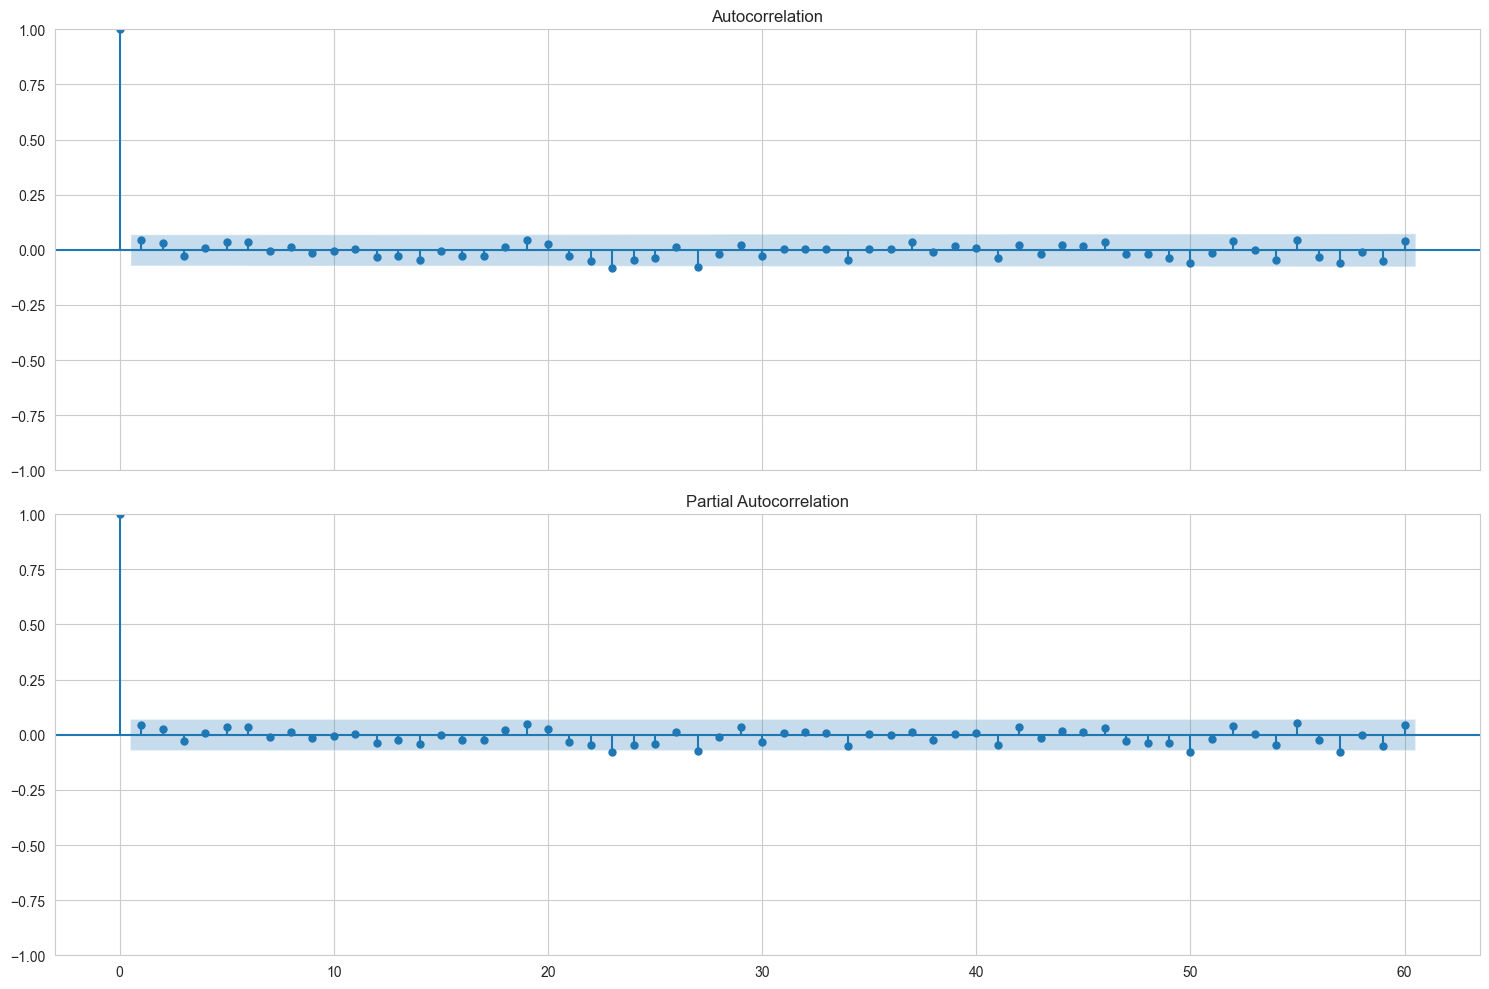

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

figsize = (15,10)
lags= 60
fig, ax = plt.subplots(nrows=2, figsize=figsize, sharex=True)
plot_acf(target_returns, ax=ax[0], lags=lags)
plot_pacf(target_returns, ax=ax[1], lags=lags)
plt.tight_layout()
plt.show()

From the ACF plots and PACF plots there seem to be no significant dependence on previous factors. Something appropriate instantly might be to do the Ljung-Box test on the data:

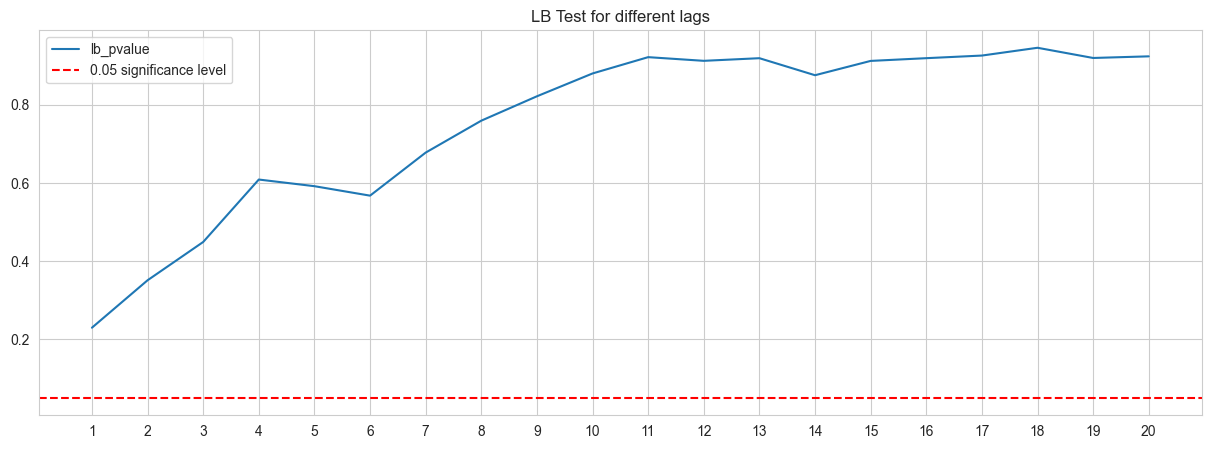

In [16]:
from statsmodels.stats.diagnostic import acorr_ljungbox

ljb_test = acorr_ljungbox(target_returns, lags=20)
fig, ax = plt.subplots(figsize=(15,5))
ljb_test["lb_pvalue"].plot(ax=ax)
ax.set_title("LB Test for different lags")
ax.set_xticks(ljb_test.index)
ax.axhline(y=0.05, color="red", linestyle="--", label="0.05 significance level")
ax.legend()
plt.show()

From the Ljung Box Test it seems that none of the lags have a statistically significant effect on the current time-step. It seems further predictors must be added to capture a significant effect of the lag. However there is a clear trend in the data so it must be that the returns are dependent. We conclude that the differencing procedure is not appropriate for modelling. 

<Axes: ylabel='Count'>

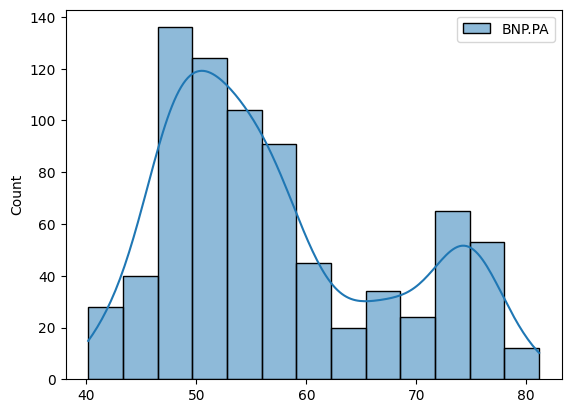

In [15]:
sns.histplot(target_series, kde=True)

The returns still look skewed despite the log transformation. For the purposes of predicting returns easier it might be helpful to just keep the time-series in the regular differences.  

# <a id="Create Strategy">__Strategy Creation__ </a>

In [34]:
import backtesting # To backtest the strategy
import heuristic_pf_construct # To test out the weighted strategies.
import eda_pipeline

from typing import Optional, List, Tuple, Dict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Recreation of the dataset we are trying to retrieve.
tickers = [
    "JPM",   # JPMorgan (NYSE)
    "GS",    # Goldman Sachs (NYSE)
    "MS",    # Morgan Stanley (NYSE)
    "BAC",   # Bank of America (NYSE)
    "C",     # Citigroup (NYSE)
    "UBS",   # UBS (NYSE / SIX)
    "BARC.L",# Barclays (LSE)
    "HSBA.L",# HSBC (LSE)
    "BNP.PA" # BNP Paribas (Euronext Paris)
]

columns_wanted = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]

data = yf.download(
    tickers=tickers,
    period="3y",          # or use start="2022-01-01", end="2025-11-26"
    interval="1d",
    group_by="ticker",    # organizes returned DataFrame by ticker first
    threads=True,
    auto_adjust=False     # keep Adj Close column rather than auto-adjusting all columns
)

# --- 5) Quick derived metrics examples ---
# 5  using Adj Close
adj = pd.concat({t: data[t]["Adj Close"] for t in tickers}, axis=1)

adj = eda_pipeline.eda_pipeline(adj)
"""
Currently my implementation is spaghetti code - but we will need to fix this later.
"""

def equal_weighting(
    tradable_assets, 
    history, 
    nav_history, 
    #price_col: str = "price",
    #risk_col: str = "risk",
    #mcap_col: str = "mcap",            # unused but kept for identical signature
    #long_only: bool = True,
    gross_exposure: float = 1.0,
) -> pd.DataFrame:
    # With no amount in cash. 
    """
    Equal weighting. If long_only=True returns all weights = 1/N.
    If long_only=False returns centered long-short equal-magnitude weights (gross exposure scaled).
    """
    n = len(tradable_assets)
    if len(history) == 0:
        return 0, pd.Series(data=np.zeros(len(tradable_assets)), index=tradable_assets)
    #if long_only:
    weights = np.ones(n) / (n + 1)
    cash = 1 / n + 1
    #else:
        # initial pattern: +1 for first half, -1 for second half (user may want to pre-sort df by signal)
        #pattern = np.concatenate([np.ones(n // 2), -np.ones(n - n // 2)])
        #weights = _normalize_weights(pattern, long_only=False, gross_exposure=gross_exposure)

    labels_and_weights = pd.Series(data=weights, index=tradable_assets)
    return cash, labels_and_weights

[*********************100%***********************]  9 of 9 completed


In [35]:
# The first strategy we will start implementing is the equal weights strategy - this will be based on the weights of the previous trading day. 

EqualWeightStrategy = backtesting.FunctionStrategy(name="equal_weight", 
                                                   user_fn=heuristic_pf_construct.equal_weighting)

tradable_assets = [
    "JPM",   # JPMorgan (NYSE)
    "GS",    # Goldman Sachs (NYSE)
    "MS",    # Morgan Stanley (NYSE)
    "BAC",   # Bank of America (NYSE)
    "C",     # Citigroup (NYSE)
]

# Need to wrap the strategy function into a strategy to be compatible with the pipeline
strategy_name = "equal_weights"
equal_weights = equal_weighting


backtester = backtesting.Backtester(tradable_assets=tradable_assets,
                                    data = adj,
                                    strategy_fn=equal_weights,
                                    strategy_name=strategy_name,
                                    allow_short=False,
                                    cash_start=100000,
                                    riskfree_per_period=0.04 / 252)

backtester.run(verbose=False)

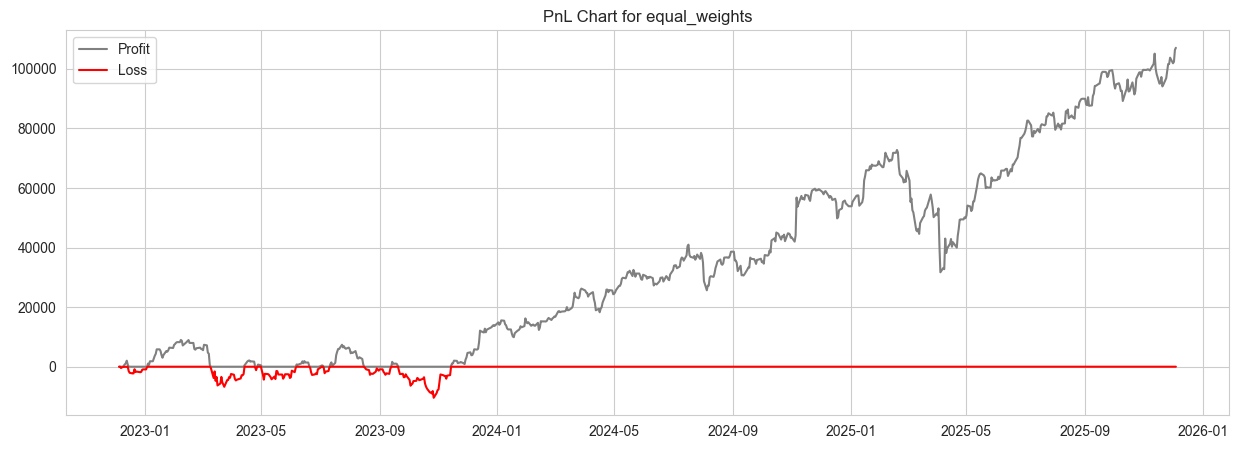

In [36]:
backtester.plot_pnl_curve()

In [37]:
# --- parameters ---
initial_investment = 100_000
SNP = "SPY"   # S&P 500 ETF

# --- download daily data ---
data = yf.download(
    tickers=SNP,
    period="3y",          # or use start="2022-01-01", end="2025-11-26"
    interval="1d",
    group_by="ticker",    # organizes returned DataFrame by ticker first
    threads=True,
    auto_adjust=False     # keep Adj Close column rather than auto-adjusting all columns
)

# --- use Adjusted Close for correct return calculation (dividends!) ---
prices = data[SNP]["Adj Close"]

# --- compute returns ---
returns = prices.pct_change().dropna()

# --- compute portfolio value series ---
# assume you buy-and-hold SPY with the full initial amount
shares = initial_investment / prices.iloc[0]
portfolio_value = shares * prices

# --- put everything into a single DataFrame ---
benchmark = pd.DataFrame({
    "spy_daily_return": returns,
})

print(benchmark.tail())

benchmark.describe()
benchmark.fillna(0, inplace=True)


[*********************100%***********************]  1 of 1 completed

            spy_daily_return
Date                        
2025-11-28          0.005458
2025-12-01         -0.004565
2025-12-02          0.001852
2025-12-03          0.003463
2025-12-04         -0.001214


In [33]:
backtester.portfolio_returns

Date
2022-12-05    0.000000
2022-12-06    0.000000
2022-12-07   -0.004387
2022-12-08    0.002137
2022-12-09    0.001382
                ...   
2025-11-28    0.010567
2025-12-01   -0.009200
2025-12-02    0.002448
2025-12-03    0.019753
2025-12-04    0.004076
Length: 776, dtype: float64

# <a id="Strategy3"> __Momentum Based Strategy__ </a>
In this section we will be backtesting a simple strategy - We include a momentum term and test if it is a significant predictor using WLS.

In [1]:
import backtesting # To backtest the strategy
import heuristic_pf_construct # To test out the weighted strategies.
import eda_pipeline

from typing import Optional, List, Tuple, Dict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [12]:
tickers = "NVDA"
start_date = "2023-01-02"
end_date = "2025-09-30"


data = yf.download(
    tickers=tickers,
    start=start_date,
    end=end_date,          # or use start="2022-01-01", end="2025-11-26"
    interval="1d",
    group_by="ticker",    # organizes returned DataFrame by ticker first
    threads=True,
    auto_adjust=False     # keep Adj Close column rather than auto-adjusting all columns
)

columns_wanted = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]

adj = data[tickers][["Adj Close"]]



[*********************100%***********************]  1 of 1 completed


##  <a id="Strategy3EDA"> Checking for Missing Values </a>

In [13]:
eda_pipeline.missing_and_duplicates(adj)

Total rows: 687, Duplicated rows: 5
First 5 duplicated rows (by index peek):
Price        Adj Close
Date                  
2023-12-28   49.494423
2023-12-29   49.494423
2024-06-28  123.487152
2024-07-22  123.487152
2025-01-08  140.071701

Top missing columns:
Empty DataFrame
Columns: [missing_count, missing_percentage]
Index: []


From the above we conclude that there are no missing values in the data - it is safe to proceed.

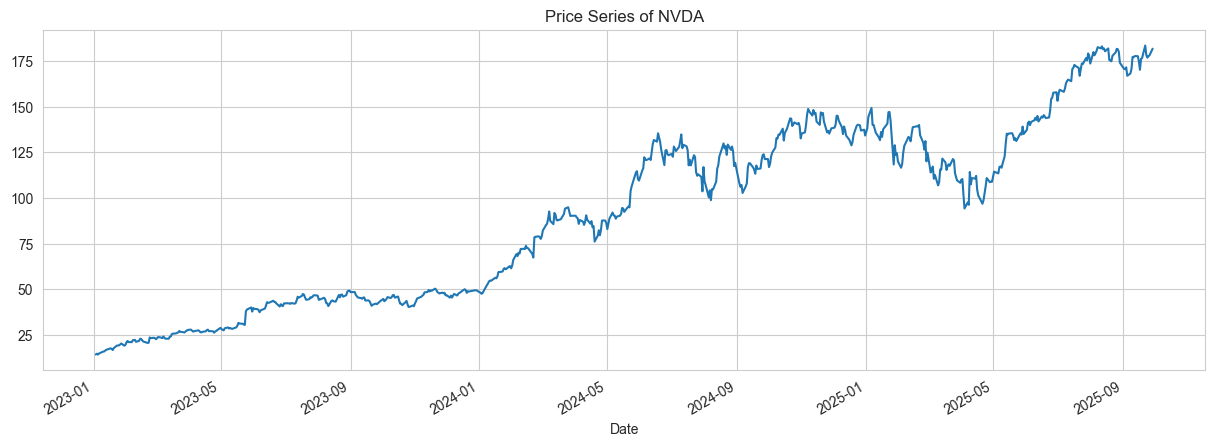

In [10]:
plt.figure(figsize=(15,5))
adj.plot()
plt.title("Price Series of NVDA")
plt.show()

We now want to include momentum as a regressor, and plot the time series of momentum. For now - we include the following:

1. weekly momentum 
2. 30-day momentum

In [ ]:
# Mark for review - !!!! NOTE THAT WE NEED TO CHECK IF THE DATES ARE ALIGNED!!!

adj["7d_momentum"] = adj["Adj Close"] / adj["Adj Close"].shift(7) - 1
adj["30d_momentum"] = adj["Adj Close"] / adj["Adj Close"].shift(30) - 1

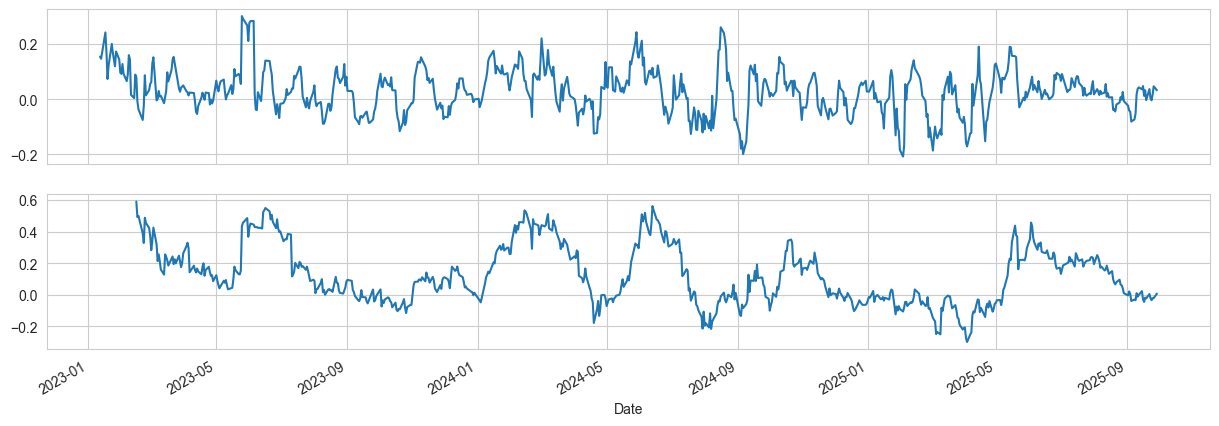

In [18]:
plot_7d_momentum = adj["7d_momentum"].dropna()
plot_30d_momentum = adj["30d_momentum"].dropna()

fig, ax = plt.subplots(nrows=2, figsize=(15,5), sharex = True)
plot_7d_momentum.plot(ax=ax[0])
plot_30d_momentum.plot(ax=ax[1])
plt.show()